In [1]:
import pandas as pd
import numpy as np
import statsmodels as st
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("SPD_DS_test.csv")

In [3]:
all_cols = df.columns

In [4]:
target = "MF1-BJP - ACTIVE POWER"
feature_cols = all_cols.drop(target)
feature_cols = feature_cols.drop("ts")

In [5]:
feature_cols

Index(['SP2-4-EM - Horizontal Irradiance 1',
       'SP2-4-EM - Horizontal Irradiance 2',
       'SP4-3-EM - Horizontal Irradiance 1',
       'SP4-3-EM - Horizontal Irradiance 2', 'SP2-ITS2-WS22 - IRRADIANCE',
       'SP2-ITS2-WS22 - AMBIENT TEMPERATURE',
       'SP2-ITS2-WS22 - PANEL TEMPERATURE', 'SP2-ITS6-WS26 - IRRADIANCE',
       'SP2-ITS6-WS26 - AMBIENT TEMPERATURE',
       'SP2-ITS6-WS26 - PANEL TEMPERATURE', 'SP4-ITS1-WS41 - IRRADIANCE',
       'SP4-ITS1-WS41 - AMBIENT TEMPERATURE',
       'SP4-ITS1-WS41 - PANEL TEMPERATURE', 'SP4-ITS6-WS46 - IRRADIANCE',
       'SP4-ITS6-WS46 - AMBIENT TEMPERATURE',
       'SP4-ITS6-WS46 - PANEL TEMPERATURE'],
      dtype='object')

In [6]:
df.shape

(105409, 18)

## Get some statistics

In [7]:
df.describe()

,SP2-4-EM - Horizontal Irradiance 1,SP2-4-EM - Horizontal Irradiance 2,SP4-3-EM - Horizontal Irradiance 1,SP4-3-EM - Horizontal Irradiance 2,SP2-ITS2-WS22 - IRRADIANCE,SP2-ITS2-WS22 - AMBIENT TEMPERATURE,SP2-ITS2-WS22 - PANEL TEMPERATURE,SP2-ITS6-WS26 - IRRADIANCE,SP2-ITS6-WS26 - AMBIENT TEMPERATURE,SP2-ITS6-WS26 - PANEL TEMPERATURE,SP4-ITS1-WS41 - IRRADIANCE,SP4-ITS1-WS41 - AMBIENT TEMPERATURE,SP4-ITS1-WS41 - PANEL TEMPERATURE,SP4-ITS6-WS46 - IRRADIANCE,SP4-ITS6-WS46 - AMBIENT TEMPERATURE,SP4-ITS6-WS46 - PANEL TEMPERATURE,MF1-BJP - ACTIVE POWER
count,54123.000000,53975.000000,53903.000000,54048.000000,56851.000000,103549.000000,103514.000000,53950.000000,66841.000000,103417.000000,54413.000000,103543.000000,103543.000000,53991.000000,103552.000000,94489.000000,104440.000000
mean,470.337539,475.033603,471.997101,470.158204,553.443251,27.524792,35.322613,582.985338,21.111984,33.220181,577.476677,26.940316,33.162524,581.564146,29.204962,30.555955,13821.532014
std,338.790887,341.894995,339.064584,337.740472,388.847410,6.436109,17.685333,379.927021,10.308026,15.482341,379.048456,6.412744,15.745773,376.585407,8.394303,18.572962,19258.982034
min,0.001000,0.001000,0.001000,0.001000,0.001000,1.419000,1.500000,0.001000,0.002000,0.097000,0.001000,0.612000,0.563000,0.001000,2.438000,0.001000,-321.775000
25%,159.283500,161.968000,163.033000,162.213500,146.260000,22.905000,21.858000,202.950000,13.591000,21.152000,196.067000,22.527000,21.082000,205.743500,22.665000,15.872000,-119.591250
50%,436.387000,439.696000,437.934000,437.319500,614.413000,26.308000,26.303000,654.886500,21.983000,25.836000,649.533000,25.882000,25.507000,653.493000,27.088000,25.026000,0.000000
75%,765.739500,773.851000,764.346500,759.936250,909.680000,32.637000,51.463500,922.440000,28.982000,47.218000,917.373000,32.105000,47.743000,920.566500,36.543250,46.486000,32424.699500
max,1199.886000,1199.936000,1199.898000,1199.276000,1199.947000,46.884000,79.975000,1199.987000,45.752000,77.872000,1199.973000,46.568000,71.552000,1199.840000,53.554000,78.017000,54491.309000


## Look for missing vals

In [8]:
missingValues = df.isna().sum()
#mask = data.value > 0
col = []
qnt = []
perc = []
total = df.shape[0]
for items in missingValues.items():
    #print(items)
    if items[1] > 0:
        #print(items)
        col.append(items[0])
        qnt.append(items[1])
        perc.append((items[1]/total)*100)
new_df = pd.DataFrame({"cols":col,"Missing Ratio":perc,"Missing Number":qnt})
new_df

,cols,Missing Ratio,Missing Number
0,SP2-4-EM - Horizontal Irradiance 1,48.654289,51286
1,SP2-4-EM - Horizontal Irradiance 2,48.794695,51434
2,SP4-3-EM - Horizontal Irradiance 1,48.863000,51506
3,SP4-3-EM - Horizontal Irradiance 2,48.725441,51361
4,SP2-ITS2-WS22 - IRRADIANCE,46.066275,48558
5,SP2-ITS2-WS22 - AMBIENT TEMPERATURE,1.764555,1860
6,SP2-ITS2-WS22 - PANEL TEMPERATURE,1.797759,1895
7,SP2-ITS6-WS26 - IRRADIANCE,48.818412,51459
8,SP2-ITS6-WS26 - AMBIENT TEMPERATURE,36.588906,38568
9,SP2-ITS6-WS26 - PANEL TEMPERATURE,1.889782,1992


In [9]:
cols_to_drop = new_df[new_df["Missing Ratio"]>20]["cols"]

In [10]:
cols_to_drop

0      SP2-4-EM - Horizontal Irradiance 1
1      SP2-4-EM - Horizontal Irradiance 2
2      SP4-3-EM - Horizontal Irradiance 1
3      SP4-3-EM - Horizontal Irradiance 2
4              SP2-ITS2-WS22 - IRRADIANCE
7              SP2-ITS6-WS26 - IRRADIANCE
8     SP2-ITS6-WS26 - AMBIENT TEMPERATURE
10             SP4-ITS1-WS41 - IRRADIANCE
13             SP4-ITS6-WS46 - IRRADIANCE
Name: cols, dtype: object

## Looking for some seasonality

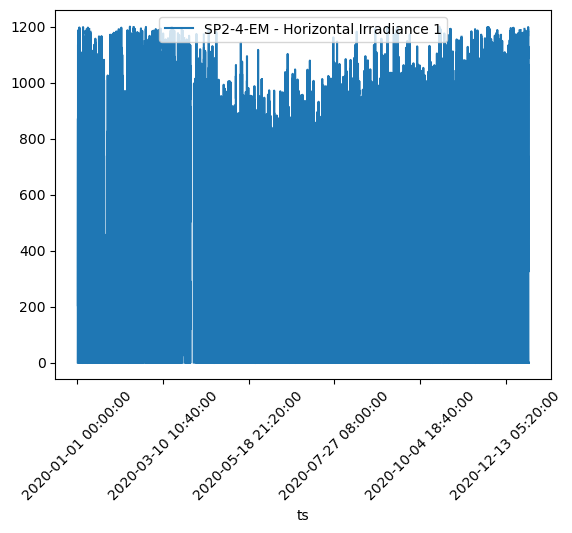

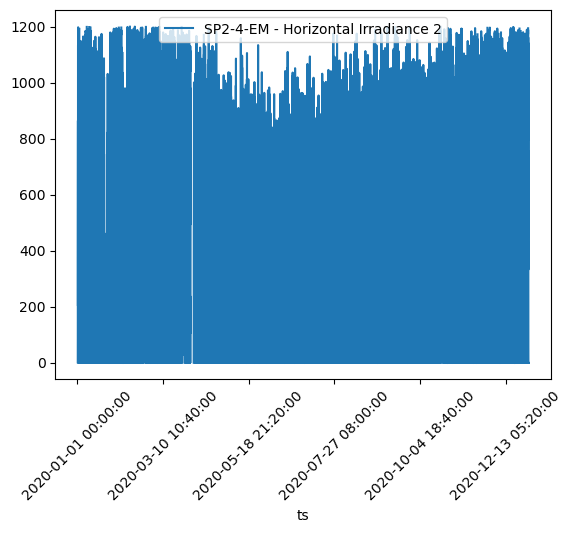

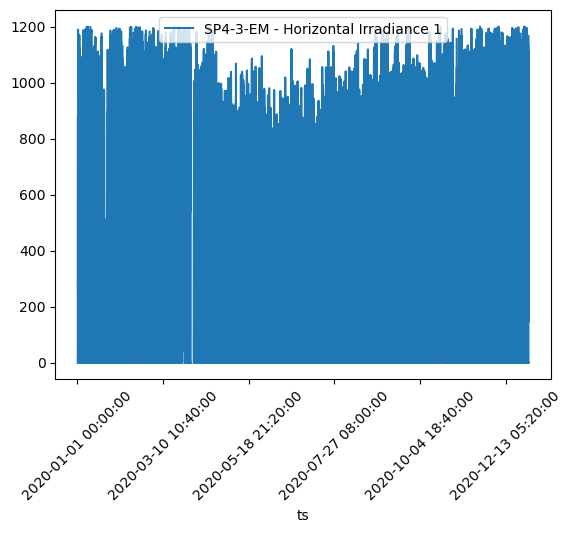

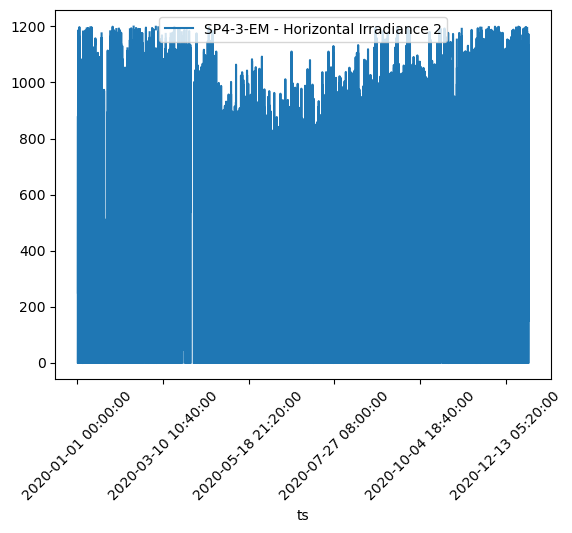

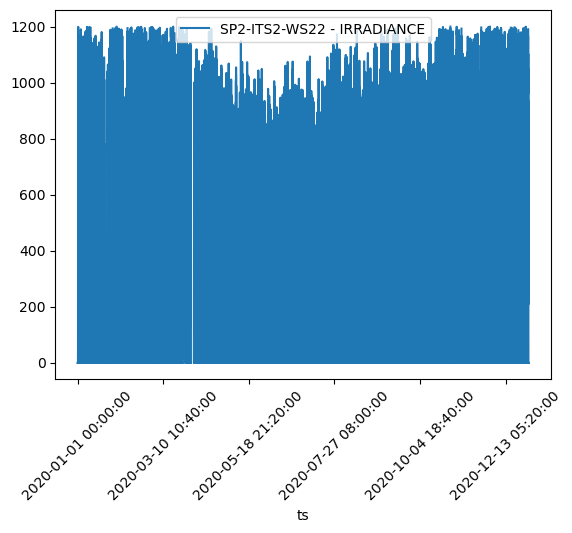

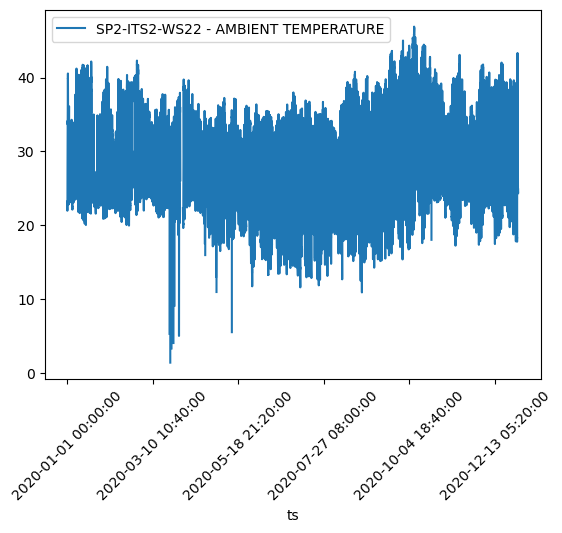

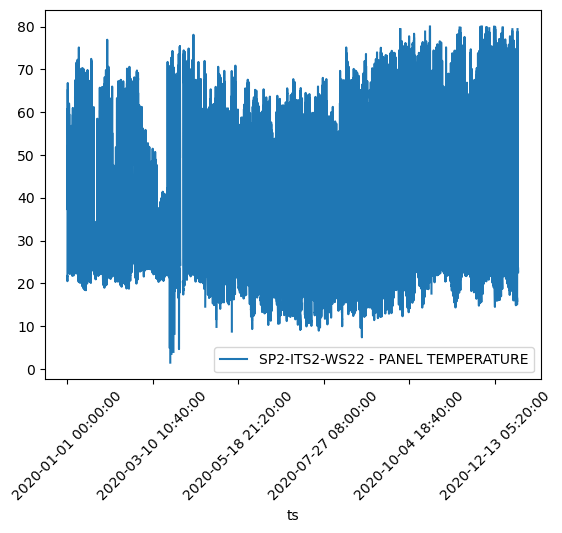

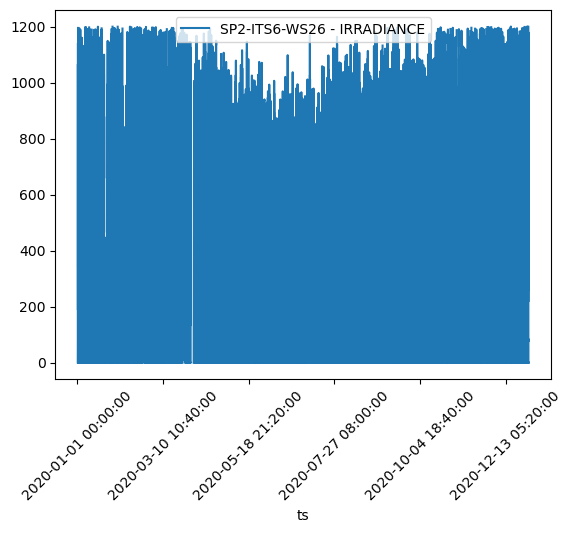

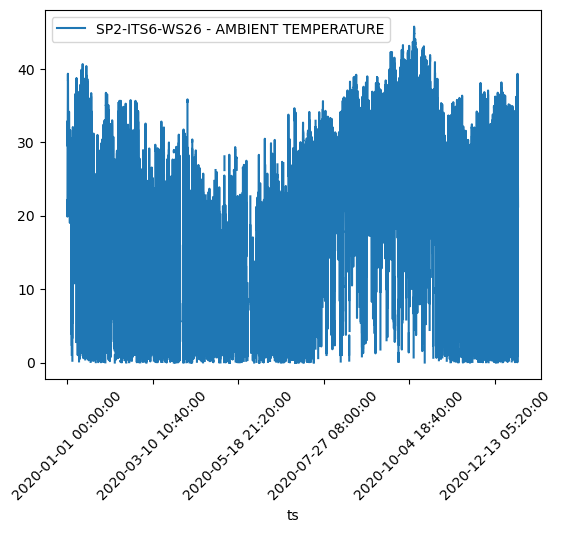

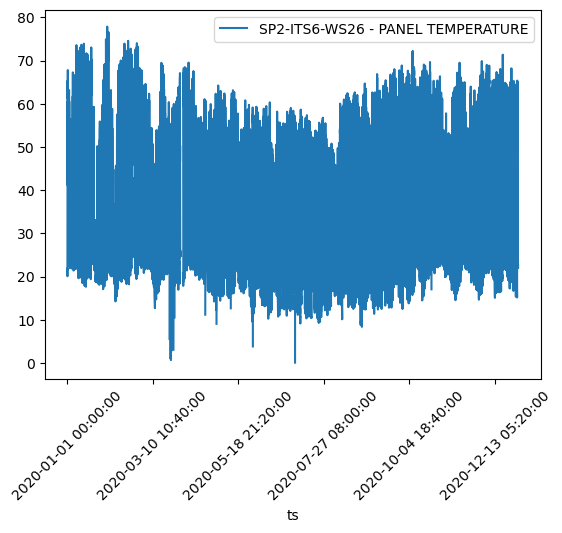

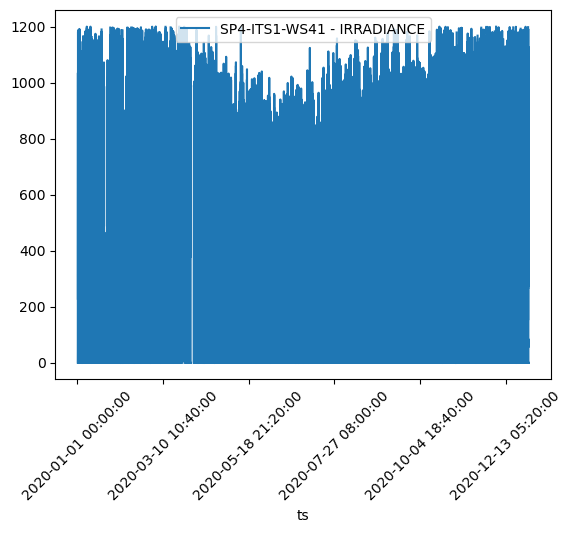

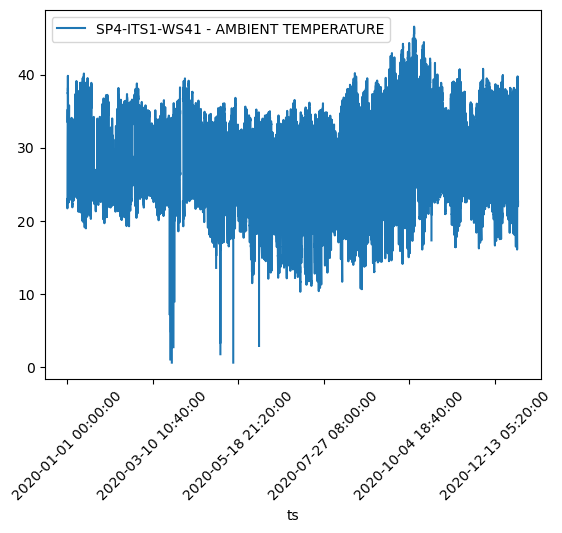

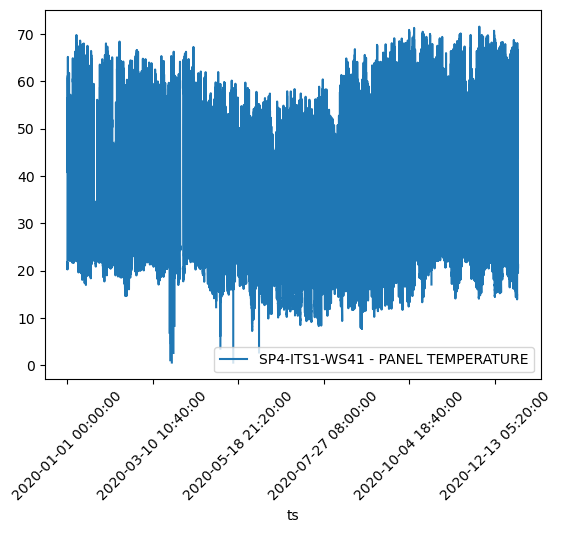

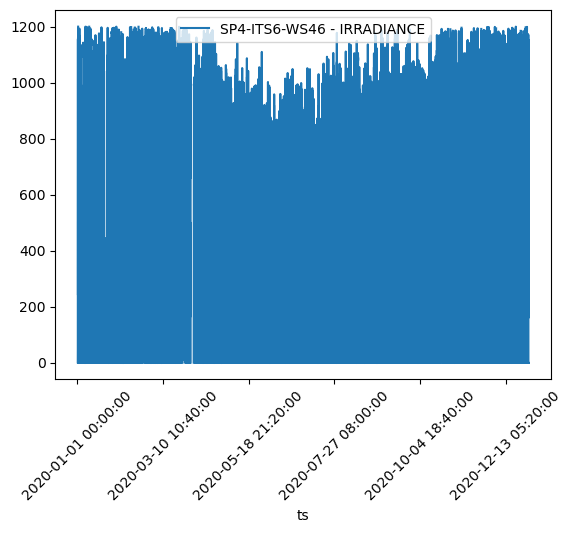

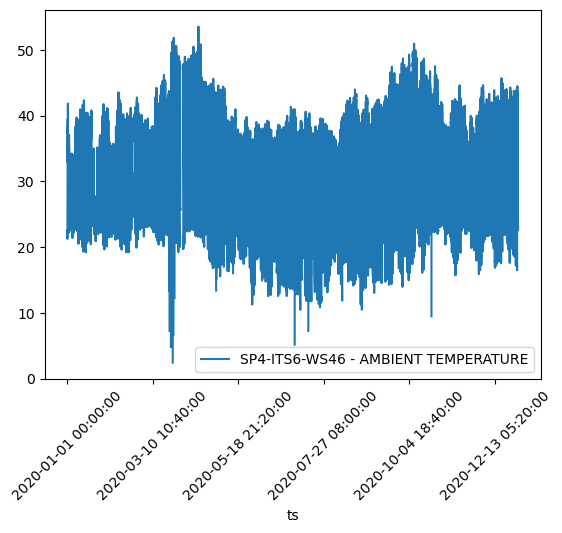

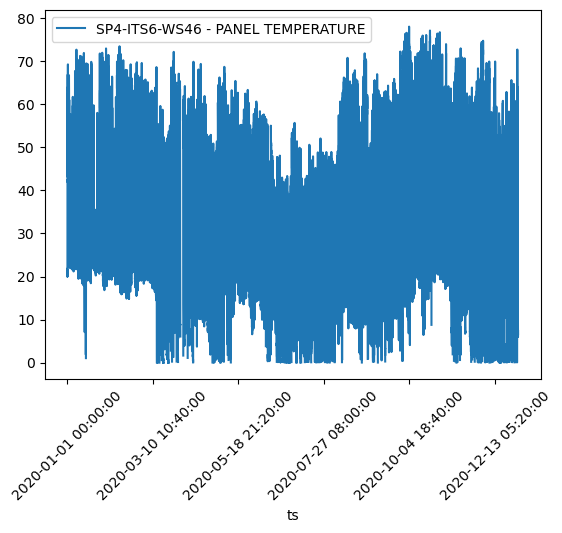

In [11]:
for col in feature_cols:
    df.plot(x="ts", y=col)
    plt.xticks(rotation=45)

## Transform column 'ts' to datetime type, interpolate for missing data completion

In [12]:
df['ts'] = pd.to_datetime(df['ts'],format='%Y-%m-%d %H:%M:%S')
min_date = df["ts"].min()
max_date = df["ts"].max()
dates = pd.date_range(start=min_date, end=max_date, freq='5min')
print(min_date,max_date)

2020-01-01 00:00:00 2021-01-01 00:00:00


In [13]:
dates.shape

(105409,)

In [14]:
df.shape

(105409, 18)

In [15]:
from sklearn.preprocessing import StandardScaler
df[feature_cols] = StandardScaler().fit_transform(df[feature_cols])

In [16]:
series = df.set_index("ts").reindex(dates).interpolate().ffill().bfill()

In [17]:
series.corr()

,SP2-4-EM - Horizontal Irradiance 1,SP2-4-EM - Horizontal Irradiance 2,SP4-3-EM - Horizontal Irradiance 1,SP4-3-EM - Horizontal Irradiance 2,SP2-ITS2-WS22 - IRRADIANCE,SP2-ITS2-WS22 - AMBIENT TEMPERATURE,SP2-ITS2-WS22 - PANEL TEMPERATURE,SP2-ITS6-WS26 - IRRADIANCE,SP2-ITS6-WS26 - AMBIENT TEMPERATURE,SP2-ITS6-WS26 - PANEL TEMPERATURE,SP4-ITS1-WS41 - IRRADIANCE,SP4-ITS1-WS41 - AMBIENT TEMPERATURE,SP4-ITS1-WS41 - PANEL TEMPERATURE,SP4-ITS6-WS46 - IRRADIANCE,SP4-ITS6-WS46 - AMBIENT TEMPERATURE,SP4-ITS6-WS46 - PANEL TEMPERATURE,MF1-BJP - ACTIVE POWER
SP2-4-EM - Horizontal Irradiance 1,1.000000,0.999132,0.950286,0.950137,0.927787,0.687394,0.883273,0.936685,0.389366,0.886886,0.920413,0.681926,0.889175,0.908929,0.745703,0.825225,0.864606
SP2-4-EM - Horizontal Irradiance 2,0.999132,1.000000,0.950179,0.950067,0.926901,0.694761,0.885183,0.935833,0.391254,0.888756,0.919208,0.689237,0.890718,0.907719,0.750715,0.827067,0.864335
SP4-3-EM - Horizontal Irradiance 1,0.950286,0.950179,1.000000,0.999759,0.907568,0.688337,0.878876,0.921651,0.391929,0.881613,0.934948,0.684382,0.891782,0.943420,0.750919,0.835669,0.869738
SP4-3-EM - Horizontal Irradiance 2,0.950137,0.950067,0.999759,1.000000,0.907986,0.689951,0.879616,0.922069,0.393466,0.882275,0.935366,0.685954,0.892677,0.943895,0.752000,0.836805,0.870302
SP2-ITS2-WS22 - IRRADIANCE,0.927787,0.926901,0.907568,0.907986,1.000000,0.680322,0.919652,0.954333,0.395660,0.907533,0.947393,0.675586,0.911052,0.939079,0.754424,0.841808,0.887559
SP2-ITS2-WS22 - AMBIENT TEMPERATURE,0.687394,0.694761,0.688337,0.689951,0.680322,1.000000,0.854755,0.682130,0.532819,0.871675,0.672318,0.986885,0.864899,0.676751,0.926007,0.819640,0.626442
SP2-ITS2-WS22 - PANEL TEMPERATURE,0.883273,0.885183,0.878876,0.879616,0.919652,0.854755,1.000000,0.910121,0.476374,0.968492,0.903767,0.846545,0.972251,0.902588,0.880768,0.900607,0.834365
SP2-ITS6-WS26 - IRRADIANCE,0.936685,0.935833,0.921651,0.922069,0.954333,0.682130,0.910121,1.000000,0.396486,0.918553,0.974081,0.680851,0.921870,0.953494,0.758108,0.850487,0.896131
SP2-ITS6-WS26 - AMBIENT TEMPERATURE,0.389366,0.391254,0.391929,0.393466,0.395660,0.532819,0.476374,0.396486,1.000000,0.472224,0.393290,0.540691,0.486342,0.392925,0.460678,0.496525,0.333360
SP2-ITS6-WS26 - PANEL TEMPERATURE,0.886886,0.888756,0.881613,0.882275,0.907533,0.871675,0.968492,0.918553,0.472224,1.000000,0.908092,0.868958,0.984428,0.904731,0.893443,0.913661,0.840324


In [18]:
missingValues = series.isna().sum()
#mask = data.value > 0
col = []
qnt = []
perc = []
total = series.shape[0]
for items in missingValues.items():
    #print(items)
    if items[1] > 0:
        #print(items)
        col.append(items[0])
        qnt.append(items[1])
        perc.append((items[1]/total)*100)
new_df = pd.DataFrame({"":col,"Missing Ratio":perc,"Missing Number":qnt})
new_df

,,Missing Ratio,Missing Number


In [19]:
# series[series.isna().any(axis=1)]

## Split train and test

In [20]:
def split_train_test(series,threshold = "2020-11-01 00:00:00",percentage=None):
    if percentage is not None:
        total = series.shape[0]
        total_train = int(percentage*total)
        return series.iloc[:total_train], series.iloc[total_train:]
    test = series[series.index >= threshold]
    train = series[series.index < threshold]
    return train,test

In [21]:
full_train, test = split_train_test(series)

In [22]:
full_train.shape[0] + test.shape[0] == series.shape[0]

True

In [23]:
train, val = split_train_test(full_train,percentage=0.85)

In [24]:
val

,SP2-4-EM - Horizontal Irradiance 1,SP2-4-EM - Horizontal Irradiance 2,SP4-3-EM - Horizontal Irradiance 1,SP4-3-EM - Horizontal Irradiance 2,SP2-ITS2-WS22 - IRRADIANCE,SP2-ITS2-WS22 - AMBIENT TEMPERATURE,SP2-ITS2-WS22 - PANEL TEMPERATURE,SP2-ITS6-WS26 - IRRADIANCE,SP2-ITS6-WS26 - AMBIENT TEMPERATURE,SP2-ITS6-WS26 - PANEL TEMPERATURE,SP4-ITS1-WS41 - IRRADIANCE,SP4-ITS1-WS41 - AMBIENT TEMPERATURE,SP4-ITS1-WS41 - PANEL TEMPERATURE,SP4-ITS6-WS46 - IRRADIANCE,SP4-ITS6-WS46 - AMBIENT TEMPERATURE,SP4-ITS6-WS46 - PANEL TEMPERATURE,MF1-BJP - ACTIVE POWER
2020-09-16 06:00:00,-1.325737,-1.339244,-1.335384,-1.347912,-1.353366,-1.571266,-1.172707,-1.478033,-0.522993,-1.189243,-1.412230,-1.604206,-1.193502,-1.475443,-1.121952,-0.973892,500.609
2020-09-16 06:05:00,-1.287150,-1.308930,-1.300272,-1.323769,-1.284675,-1.556040,-1.159249,-1.419937,-0.519306,-1.171029,-1.323222,-1.605142,-1.169242,-1.403695,-1.069297,-0.914235,1417.769
2020-09-16 06:10:00,-1.242057,-1.273393,-1.256926,-1.256980,-1.198324,-1.524343,-1.126510,-1.339063,-0.513777,-1.142028,-1.216931,-1.607793,-1.127452,-1.314763,-0.989123,-0.821626,2722.045
2020-09-16 06:15:00,-1.193474,-1.230400,-1.209026,-1.204377,-1.096353,-1.495288,-1.066743,-1.242138,-0.526582,-1.081636,-1.098568,-1.586429,-1.054607,-1.213989,-0.841880,-0.691275,4624.055
2020-09-16 06:20:00,-1.145377,-1.183487,-1.159318,-1.152461,-0.979519,-1.459708,-0.984188,-1.128065,-0.830426,-1.003095,-0.970325,-1.538244,-0.952357,-1.094355,-0.740859,-0.568354,7108.210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 23:35:00,-1.388151,-1.389149,-1.391806,-1.391767,-1.423178,-0.501671,-0.674552,-1.534233,0.249615,-0.644878,-1.523309,-0.427637,-0.619885,-1.543964,-0.645555,-0.601520,-122.209
2020-10-31 23:40:00,-1.388151,-1.389151,-1.391805,-1.391767,-1.423291,-0.502448,-0.673703,-1.534232,0.248451,-0.645008,-1.523307,-0.426234,-0.619504,-1.543962,-0.642101,-0.600120,-122.949
2020-10-31 23:45:00,-1.388152,-1.389153,-1.391805,-1.391767,-1.423291,-0.509440,-0.675004,-1.534231,0.246025,-0.645008,-1.523306,-0.425454,-0.619822,-1.543961,-0.645079,-0.599582,-121.995
2020-10-31 23:50:00,-1.388153,-1.389154,-1.391804,-1.391767,-1.423291,-0.510216,-0.674325,-1.534230,0.245443,-0.645072,-1.523304,-0.429820,-0.620774,-1.543959,-0.641982,-0.599367,-122.578


# Fit models

In [25]:
start_pred_index = val.index.min()
finish_pred_index = val.index.max()

### First model: SimpleExpSmoothing
\begin{align*}
  \text{Forecast equation}  && \hat{y}_{t+h|t} & = \ell_{t}\\
  \text{Smoothing equation} && \ell_{t}        & = \alpha y_{t} + (1 - \alpha)\ell_{t-1},
\end{align*}

In [26]:
fitted_model = SimpleExpSmoothing(train[target], initialization_method="estimated").fit()
preds = fitted_model.predict(start=start_pred_index,end=finish_pred_index)
mean_squared_error(preds,val[target],squared=False)

/home/felipe/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


20628.72367620074

### Second model: Holt-Winters (Captures sasonality in data)
\begin{align*}
  \hat{y}_{t+h|t} &= \ell_{t} + hb_{t} + s_{t+h-m(k+1)} \\
  \ell_{t} &= \alpha(y_{t} - s_{t-m}) + (1 - \alpha)(\ell_{t-1} + b_{t-1})\\
  b_{t} &= \beta^*(\ell_{t} - \ell_{t-1}) + (1 - \beta^*)b_{t-1}\\
  s_{t} &= \gamma (y_{t}-\ell_{t-1}-b_{t-1}) + (1-\gamma)s_{t-m},
\end{align*}

In [27]:
fitted_model = ExponentialSmoothing(train[target], initialization_method="estimated").fit()
preds = fitted_model.predict(start=start_pred_index,end=finish_pred_index)
mean_squared_error(preds,val[target],squared=False)

/home/felipe/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


20628.72367620074

### Third model: Facebook Prophet
$    y(t) = g(t) + S(t) + \sum_{j=1}^N X(j,t) * β(j) + e(t)$

In [28]:
from prophet import Prophet

#### The input assumes two columns: "ds" and "y"

In [29]:
prophet_df = train
prophet_df = prophet_df.reset_index()
prophet_df.rename(columns={"index":"ds",target:"y"},inplace=True)
prophet_df

,ds,SP2-4-EM - Horizontal Irradiance 1,SP2-4-EM - Horizontal Irradiance 2,SP4-3-EM - Horizontal Irradiance 1,SP4-3-EM - Horizontal Irradiance 2,SP2-ITS2-WS22 - IRRADIANCE,SP2-ITS2-WS22 - AMBIENT TEMPERATURE,SP2-ITS2-WS22 - PANEL TEMPERATURE,SP2-ITS6-WS26 - IRRADIANCE,SP2-ITS6-WS26 - AMBIENT TEMPERATURE,SP2-ITS6-WS26 - PANEL TEMPERATURE,SP4-ITS1-WS41 - IRRADIANCE,SP4-ITS1-WS41 - AMBIENT TEMPERATURE,SP4-ITS1-WS41 - PANEL TEMPERATURE,SP4-ITS6-WS46 - IRRADIANCE,SP4-ITS6-WS46 - AMBIENT TEMPERATURE,SP4-ITS6-WS46 - PANEL TEMPERATURE,y
0,2020-01-01 00:00:00,-1.386108,-1.386724,-1.389607,-1.389116,-1.423286,-0.672116,-0.769150,-1.532546,0.097790,-0.749837,-1.523499,-0.632075,-0.740807,-1.542005,-0.822343,-0.496098,-147.594
1,2020-01-01 00:05:00,-1.386108,-1.386724,-1.389607,-1.389116,-1.423286,-0.676001,-0.768302,-1.532546,0.100313,-0.747900,-1.523499,-0.626773,-0.740553,-1.542005,-0.816029,-0.493244,-146.538
2,2020-01-01 00:10:00,-1.386108,-1.386724,-1.389607,-1.389116,-1.423286,-0.677554,-0.768811,-1.532546,0.100798,-0.744928,-1.523499,-0.614922,-0.737187,-1.542005,-0.805784,-0.490283,-147.535
3,2020-01-01 00:15:00,-1.386108,-1.386724,-1.389607,-1.389116,-1.423286,-0.682216,-0.772769,-1.532546,0.102156,-0.743830,-1.523499,-0.618040,-0.735917,-1.542005,-0.806618,-0.488291,-147.476
4,2020-01-01 00:20:00,-1.386108,-1.386724,-1.389607,-1.389116,-1.423286,-0.686721,-0.773900,-1.532546,0.102156,-0.745316,-1.523499,-0.616013,-0.736425,-1.542005,-0.800900,-0.490121,-147.413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74659,2020-09-16 05:35:00,-1.386605,-1.387511,-1.390646,-1.390267,-1.422206,-1.510049,-1.149298,-1.532877,-0.485837,-1.185497,-1.521063,-1.523741,-1.194772,-1.542977,-1.380581,-1.153885,-114.624
74660,2020-09-16 05:40:00,-1.386596,-1.387503,-1.390638,-1.390258,-1.422198,-1.516575,-1.165639,-1.532869,-0.497770,-1.197317,-1.521074,-1.540583,-1.198519,-1.542998,-1.401548,-1.160831,-115.851
74661,2020-09-16 05:45:00,-1.386587,-1.387496,-1.390630,-1.390250,-1.422191,-1.536618,-1.178022,-1.532862,-0.508732,-1.197511,-1.521085,-1.564598,-1.202266,-1.543019,-1.414295,-1.160185,-114.454
74662,2020-09-16 05:50:00,-1.378221,-1.379061,-1.382779,-1.382143,-1.414907,-1.563498,-1.182602,-1.525858,-0.518045,-1.202226,-1.513413,-1.579412,-1.211285,-1.535934,-1.419179,-1.164492,-117.463


#### Add other feature columns to make the prediction 
#### (the added cols are simply additive, since a linear regression is made)

In [30]:
m = Prophet()
for col in feature_cols:
    m.add_regressor(col)
m.fit(prophet_df)

14:33:54 - cmdstanpy - INFO - Chain [1] start processing
14:36:09 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
future = m.make_future_dataframe(periods=val.shape[0],freq="5min")
print(future.shape)
future = future.join(full_train.drop(columns=[target]),on="ds")
print(future.shape)

(87840, 1)
(87840, 17)


#### Make the predictions along with the most probable upper and lower bounds for the series (shaded). 
#### The forecast is in dark blue.

<Figure size 800x400 with 0 Axes>

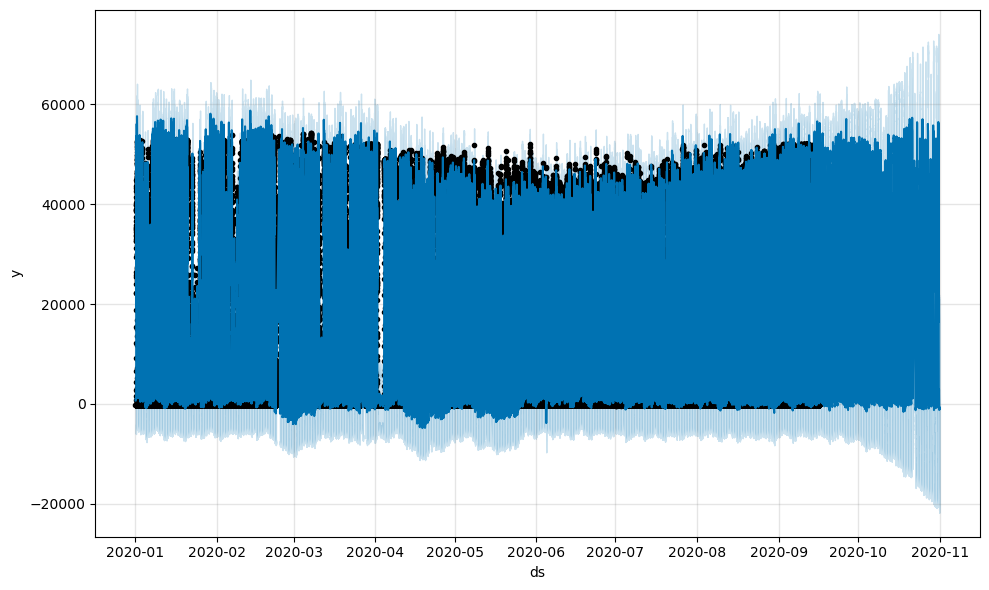

<Figure size 800x400 with 0 Axes>

In [32]:
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.figure(figsize=(8,4))

In [33]:
future.tail()

,ds,SP2-4-EM - Horizontal Irradiance 1,SP2-4-EM - Horizontal Irradiance 2,SP4-3-EM - Horizontal Irradiance 1,SP4-3-EM - Horizontal Irradiance 2,SP2-ITS2-WS22 - IRRADIANCE,SP2-ITS2-WS22 - AMBIENT TEMPERATURE,SP2-ITS2-WS22 - PANEL TEMPERATURE,SP2-ITS6-WS26 - IRRADIANCE,SP2-ITS6-WS26 - AMBIENT TEMPERATURE,SP2-ITS6-WS26 - PANEL TEMPERATURE,SP4-ITS1-WS41 - IRRADIANCE,SP4-ITS1-WS41 - AMBIENT TEMPERATURE,SP4-ITS1-WS41 - PANEL TEMPERATURE,SP4-ITS6-WS46 - IRRADIANCE,SP4-ITS6-WS46 - AMBIENT TEMPERATURE,SP4-ITS6-WS46 - PANEL TEMPERATURE
87835,2020-10-31 23:35:00,-1.388151,-1.389149,-1.391806,-1.391767,-1.423178,-0.501671,-0.674552,-1.534233,0.249615,-0.644878,-1.523309,-0.427637,-0.619885,-1.543964,-0.645555,-0.601520
87836,2020-10-31 23:40:00,-1.388151,-1.389151,-1.391805,-1.391767,-1.423291,-0.502448,-0.673703,-1.534232,0.248451,-0.645008,-1.523307,-0.426234,-0.619504,-1.543962,-0.642101,-0.600120
87837,2020-10-31 23:45:00,-1.388152,-1.389153,-1.391805,-1.391767,-1.423291,-0.509440,-0.675004,-1.534231,0.246025,-0.645008,-1.523306,-0.425454,-0.619822,-1.543961,-0.645079,-0.599582
87838,2020-10-31 23:50:00,-1.388153,-1.389154,-1.391804,-1.391767,-1.423291,-0.510216,-0.674325,-1.534230,0.245443,-0.645072,-1.523304,-0.429820,-0.620774,-1.543959,-0.641982,-0.599367
87839,2020-10-31 23:55:00,-1.388154,-1.389156,-1.391803,-1.391766,-1.423291,-0.511459,-0.675569,-1.534229,0.243309,-0.645847,-1.523303,-0.434655,-0.618043,-1.543958,-0.645675,-0.597967


#### Facebook prophet decomposes the series in:
1. Trend: The level of the curve
2. Sasonal (and hierarchical) components: weekly and daily seasonality
3. The additive components found via linear reagression

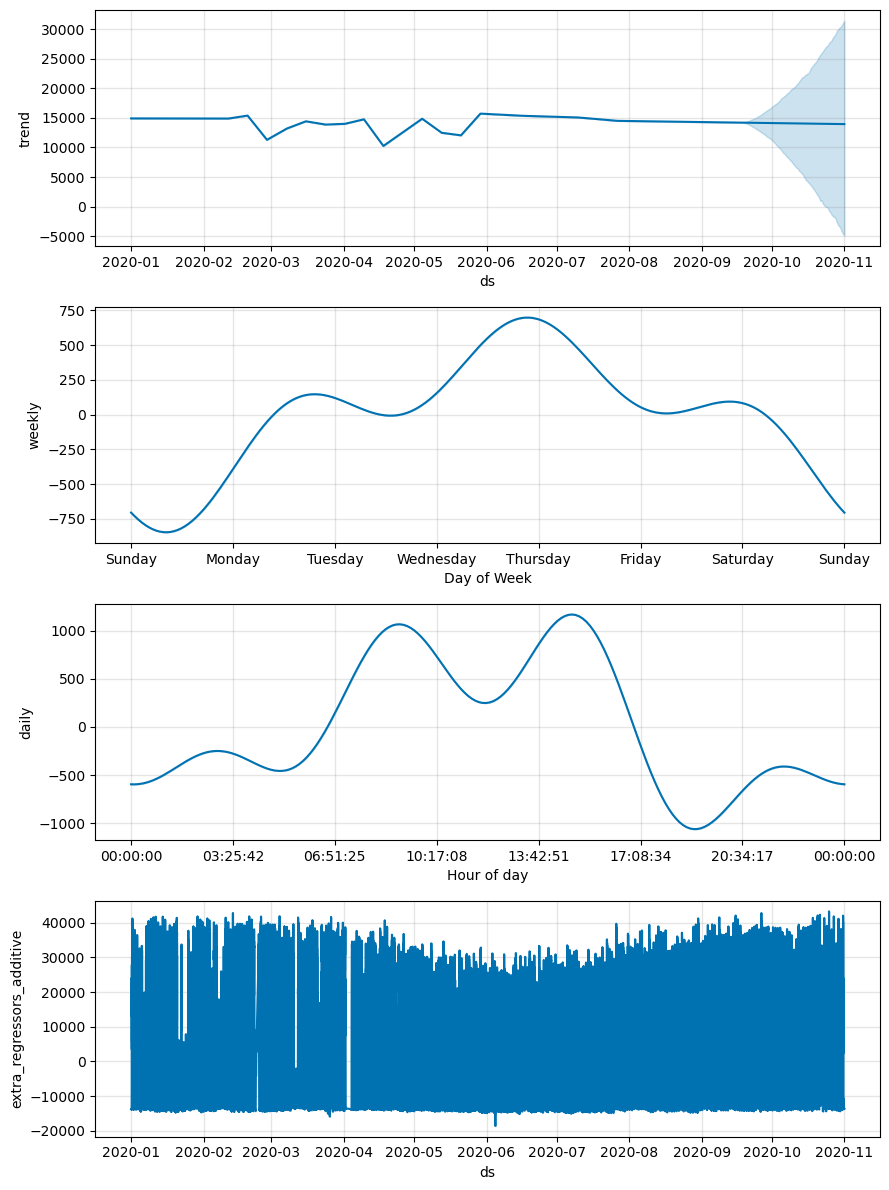

In [34]:
fig2 = m.plot_components(forecast)

In [35]:
preds = forecast[(forecast.ds >= start_pred_index) & (forecast.ds <= finish_pred_index)].yhat
mean_squared_error(preds,val[target],squared=False)

17479.282053508603

#### Check if droping the columns with most filled NAN the model performs better

In [36]:
m = Prophet()
for col in feature_cols.drop(cols_to_drop):
    m.add_regressor(col)
m.fit(prophet_df)
future = m.make_future_dataframe(periods=val.shape[0],freq="5min")
future = future.join(full_train.drop(columns=[target]),on="ds")
forecast = m.predict(future)
preds = forecast[(forecast.ds >= start_pred_index) & (forecast.ds <= finish_pred_index)].yhat
mean_squared_error(preds,val[target],squared=False)

14:36:52 - cmdstanpy - INFO - Chain [1] start processing
14:38:29 - cmdstanpy - INFO - Chain [1] done processing


17517.630775595393

#### The results were close, but adding those columns the performance was better, so we keep them 

## Fourth: a RNN model

### Prepare the data: shift target column, so we start making predictions for t=1 (the series begin at t=0)
### Drop the last row of feature columns 

In [37]:
X_train = train.iloc[:-1]
Y_train = train[target].iloc[1:]
X_val = val.iloc[:-1]
X_val.loc[-1] = train.iloc[-1] 
Y_val = val[target]
X_test = test.iloc[:-1]
X_test.loc[-1] = val.iloc[-1] 
Y_test = test[target]
print(X_train.shape,Y_train.shape,"--",X_val.shape,Y_val.shape,"--",X_test.shape,Y_test.shape)

(74663, 17) (74663,) -- (13176, 17) (13176,) -- (17569, 17) (17569,)


In [38]:
val.shape

(13176, 17)

In [39]:
# !pip install keras
# !pip install tensorflow

In [40]:
# importing libraries
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error

2023-12-17 14:39:03.938505: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-17 14:39:04.278698: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-17 14:39:04.278783: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-17 14:39:04.339984: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-17 14:39:04.471070: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-17 14:39:04.473125: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [41]:
# train[feature_cols].shape[1],X_train.shape[1]
X_train = X_train.to_numpy().reshape((X_train.shape[0],1,X_train.shape[1]))
X_val = X_val.to_numpy().reshape((X_val.shape[0],1,X_val.shape[1]))
X_test = X_test.to_numpy().reshape((X_test.shape[0],1,X_test.shape[1]))
X_train.shape,X_val.shape,X_test.shape

((74663, 1, 17), (13176, 1, 17), (17569, 1, 17))

In [42]:
# design network
regressor = Sequential()
regressor.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dense(1))
regressor.compile(loss='mean_squared_error', optimizer='adam')
# fitting the model
history = regressor.fit(X_train, Y_train, epochs = 100, batch_size = 64,validation_data=(X_val,Y_val))
regressor.summary()

Epoch 1/100
1167/1167 [==============================] - 6s 3ms/step - loss: 571029952.0000 - val_loss: 422790176.0000
Epoch 2/100
1167/1167 [==============================] - 3s 3ms/step - loss: 570567424.0000 - val_loss: 422402400.0000
Epoch 3/100
1167/1167 [==============================] - 3s 3ms/step - loss: 569866368.0000 - val_loss: 421882336.0000
Epoch 4/100
1167/1167 [==============================] - 3s 3ms/step - loss: 569142976.0000 - val_loss: 421349600.0000
Epoch 5/100
1167/1167 [==============================] - 4s 3ms/step - loss: 568513856.0000 - val_loss: 420941792.0000
Epoch 6/100
1167/1167 [==============================] - 4s 3ms/step - loss: 567949952.0000 - val_loss: 420541024.0000
Epoch 7/100
1167/1167 [==============================] - 4s 3ms/step - loss: 567391616.0000 - val_loss: 420142016.0000
Epoch 8/100
1167/1167 [==============================] - 4s 3ms/step - loss: 566834304.0000 - val_loss: 419743520.0000
Epoch 9/100
1167/1167 [=========================

1167/1167 [==============================] - 4s 3ms/step - loss: 523401696.0000 - val_loss: 388592896.0000
Epoch 70/100
1167/1167 [==============================] - 4s 3ms/step - loss: 522708384.0000 - val_loss: 388096160.0000
Epoch 71/100
1167/1167 [==============================] - 4s 3ms/step - loss: 522015712.0000 - val_loss: 387600032.0000
Epoch 72/100
1167/1167 [==============================] - 4s 3ms/step - loss: 521328896.0000 - val_loss: 387106752.0000
Epoch 73/100
1167/1167 [==============================] - 4s 3ms/step - loss: 520638048.0000 - val_loss: 386611040.0000
Epoch 74/100
1167/1167 [==============================] - 4s 3ms/step - loss: 519941696.0000 - val_loss: 386114528.0000
Epoch 75/100
1167/1167 [==============================] - 4s 3ms/step - loss: 519250368.0000 - val_loss: 385619328.0000
Epoch 76/100
1167/1167 [==============================] - 4s 3ms/step - loss: 518563840.0000 - val_loss: 385127456.0000
Epoch 77/100
1167/1167 [=============================

## Check for model convergence

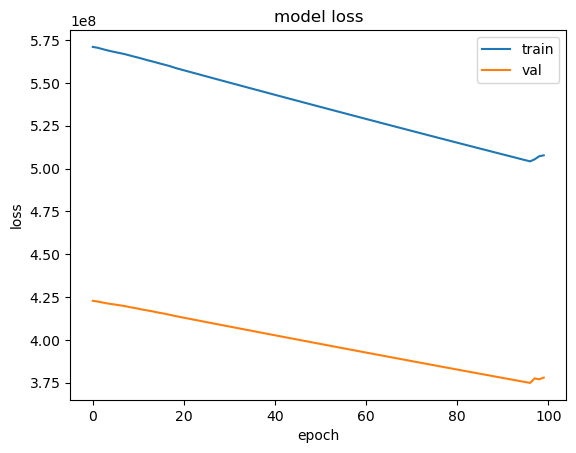

In [43]:
plt.plot(history.history['loss'],label="train")
plt.plot(history.history['val_loss'], label='val')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

In [44]:
rnn_preds = regressor.predict(X_val)
mean_squared_error(rnn_preds,Y_val)

412/412 [==============================] - 1s 2ms/step


377948160.7059269

## Prophet got the lowest MSE on validation data, so we train this model with the whole dataset 

In [45]:
prophet_df = full_train
prophet_df = prophet_df.reset_index()
prophet_df.rename(columns={"index":"ds",target:"y"},inplace=True)
m = Prophet()
for col in feature_cols:
    m.add_regressor(col)
m.fit(prophet_df)
future = m.make_future_dataframe(periods=test.shape[0],freq="5min")
print(future.shape)
future = future.join(series.drop(columns=[target]),on="ds")
print(future.shape)

14:45:46 - cmdstanpy - INFO - Chain [1] start processing
14:48:20 - cmdstanpy - INFO - Chain [1] done processing


(105409, 1)
(105409, 17)


<Figure size 800x400 with 0 Axes>

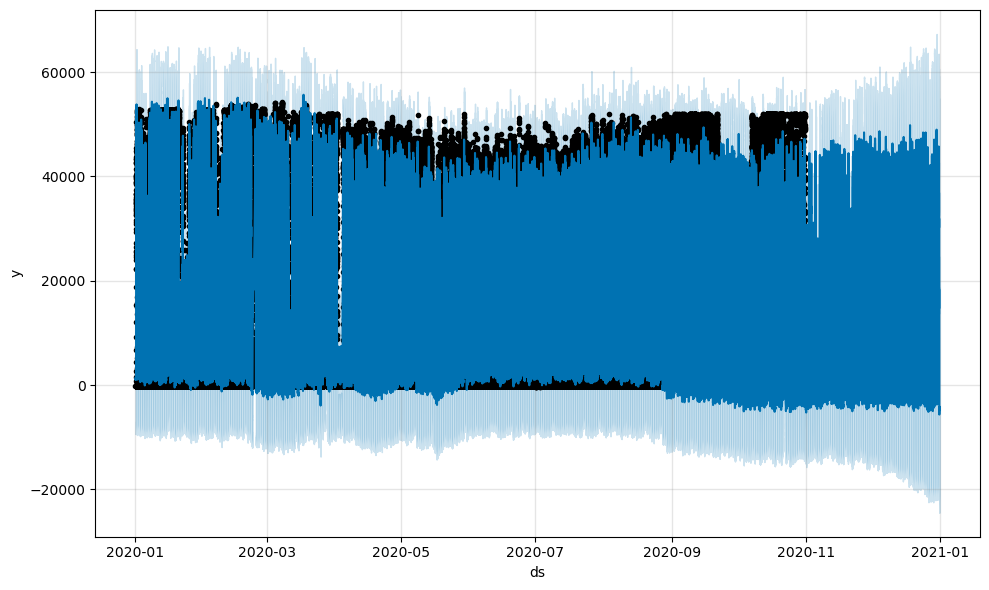

<Figure size 800x400 with 0 Axes>

In [46]:
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.figure(figsize=(8,4))

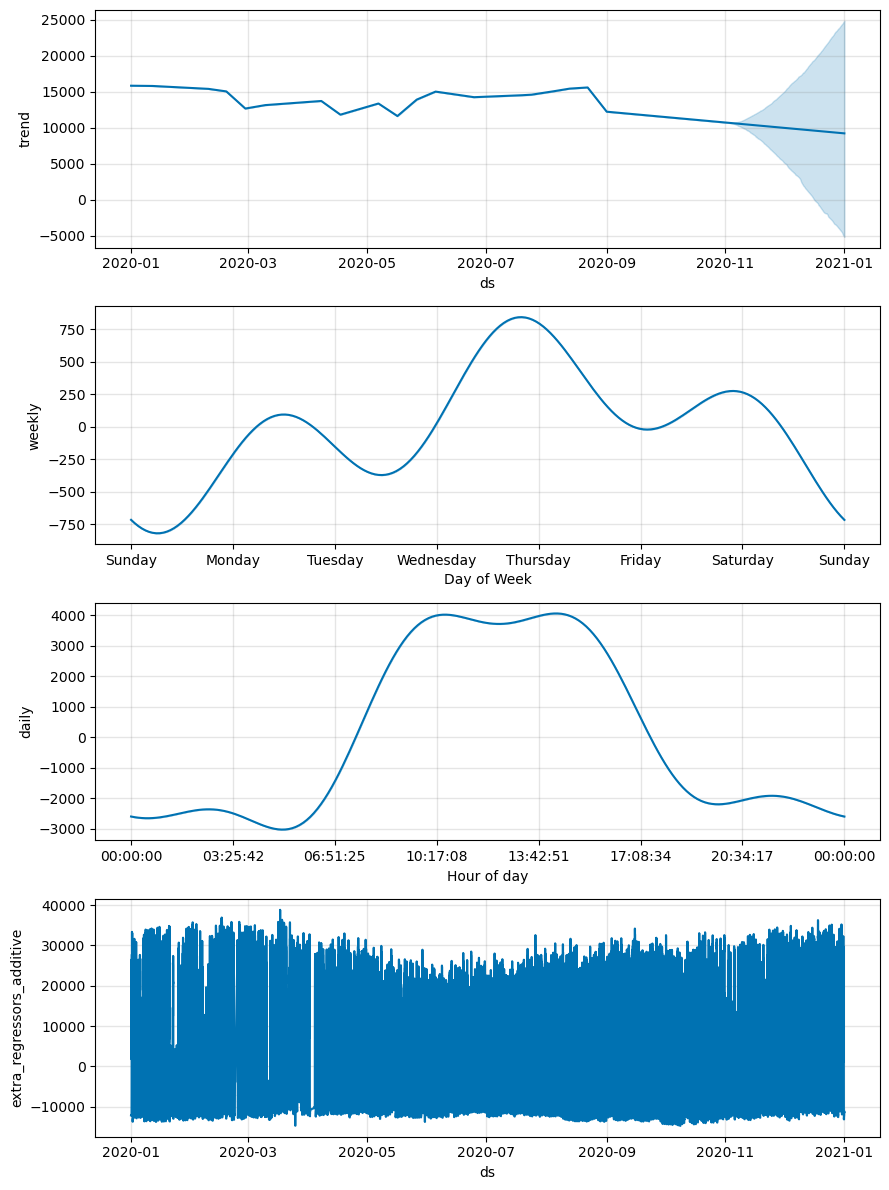

In [47]:
fig = m.plot_components(forecast)

In [48]:
preds = forecast[(forecast.ds >= test.index.min())].yhat
mean_squared_error(preds,test[target],squared=False)

8817.891057307368